## PROJECT 37: Forecasting energy consumption for train traction - PART 2

> ### TASK: To study various modern approaches and models to forecasting power consumption for train traction


### Stage goal

- **Exploratory data analysis**


### IMPORT LIBRARIES

In [1]:
# !pip install -U statsmodels

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('bmh')
import seaborn as sns
sns.set_style('darkgrid')

import statsmodels.api as sm

### LOAD DATA

In [2]:
# Path to data
data_path ="/content/drive/MyDrive/Project_37_Forecasting_energy_consumption_for_train_traction_PART_2/data/data_2_12.xlsx"

In [3]:
# Load the data
data_df = pd.read_excel(data_path)

# Check result 
data_df.head()

,Подстанция,Дата/Время,Расход Wa (кВт),Расход Wb (кВт),Грузообор a,Грузообор b,Кол-во поездов a,Кол-во поездов b,Скорость a,Скорость b,Средняя масса a,Средняя масса b
0,Амазар,2018-03-22 01:04:27,2090.5623,1357.0611,5884.6656,5947.3924,21.698590,14.485043,35.48,18.32,7403.430351,7052.501027
1,Амазар,2018-03-22 01:34:21,443.9612,835.8892,5971.9414,5960.3391,12.096189,13.568663,36.29,50.42,7448.011000,7519.644865
2,Амазар,2018-03-22 02:04:21,20.1419,2217.2885,5992.7489,5908.0217,12.002203,11.352121,33.79,32.48,7555.842784,7524.217162
3,Амазар,2018-03-22 02:34:22,1402.3804,924.8493,5934.6111,5950.0502,17.578801,14.524203,51.99,33.02,7401.525270,7252.923216
4,Амазар,2018-03-22 03:06:03,4100.5570,772.1065,5829.7923,5966.2019,15.659887,14.218743,58.50,26.34,7416.385486,7346.275757


In [4]:
data_df.tail()

,Подстанция,Дата/Время,Расход Wa (кВт),Расход Wb (кВт),Грузообор a,Грузообор b,Кол-во поездов a,Кол-во поездов b,Скорость a,Скорость b,Средняя масса a,Средняя масса b
2867,Амазар,2018-05-22 13:34:23,134.2794,3260.4715,5990.6877,5865.8369,14.680848,11.367786,34.77,23.34,7555.080676,7393.904676
2868,Амазар,2018-05-22 14:04:21,178.7594,271.9158,5989.0721,5984.6235,16.458782,10.686374,38.99,63.41,7588.230432,7307.410595
2869,Амазар,2018-05-22 14:34:14,3275.5779,287.8614,5845.9159,5978.7207,33.744673,11.328624,34.98,62.23,7556.985865,6466.475351
2870,Амазар,2018-05-22 15:10:21,2521.0956,2703.2120,5887.6020,5879.4864,13.396352,13.748804,53.81,35.24,7439.247351,7456.393703
2871,Амазар,2018-05-22 15:34:26,9356.7559,3506.3706,5570.9099,5833.6715,19.341071,20.179126,36.47,33.34,7126.420919,7167.191162


# EXPLORATORY DATA ANALYSIS

In [5]:
# The shape of the original data set
print("The shape of the original data set:\n{}".format(data_df.shape))

The shape of the original data set:
(2872, 12)


In [6]:
# Check the missing values
print("Check the number of records")
print("Number of records: ", data_df.shape[0], "\n")

print("Null analysis")
empty_sample = data_df[data_df.isnull().any(axis=1)]
print("Number of records contain 1+ null: ", empty_sample.shape[0], "\n")

Check the number of records
Number of records:  2872 

Null analysis
Number of records contain 1+ null:  0 



In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Подстанция        2872 non-null   object        
 1   Дата/Время        2872 non-null   datetime64[ns]
 2   Расход Wa (кВт)   2872 non-null   float64       
 3   Расход Wb (кВт)   2872 non-null   float64       
 4   Грузообор a       2872 non-null   float64       
 5   Грузообор b       2872 non-null   float64       
 6   Кол-во поездов a  2872 non-null   float64       
 7   Кол-во поездов b  2872 non-null   float64       
 8   Скорость a        2872 non-null   float64       
 9   Скорость b        2872 non-null   float64       
 10  Средняя масса a   2872 non-null   float64       
 11  Средняя масса b   2872 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 269.4+ KB


In [8]:
# List of variables
data_df.columns.tolist()

['Подстанция',
 'Дата/Время',
 'Расход Wa (кВт)',
 'Расход Wb (кВт)',
 'Грузообор a',
 'Грузообор b',
 'Кол-во поездов a',
 'Кол-во поездов b',
 'Скорость a',
 'Скорость b',
 'Средняя масса a',
 'Средняя масса b']

In [9]:
# Dictionary of variables
list_of_variables = {
 'Подстанция' : 'substation',
 'Дата/Время':'date', 
 'Расход Wa (кВт)':'consumption_Wa',
 'Расход Wb (кВт)':'consumption_Wb',
 'Грузообор a':'cargo_turnover_a',
 'Грузообор b':'cargo_turnover_b',
 'Кол-во поездов a':'number_of_trains_a',
 'Кол-во поездов b':'number_of_trains_b',
 'Скорость a':'speed_a',
 'Скорость b':'speed_b',
 'Средняя масса a':'average_mass_a',
 'Средняя масса b':'average_mass_b'}

In [10]:
data_df = data_df.rename(columns = list_of_variables)

data_df.head().T

,0,1,2,3,4
substation,Амазар,Амазар,Амазар,Амазар,Амазар
date,2018-03-22 01:04:27,2018-03-22 01:34:21,2018-03-22 02:04:21,2018-03-22 02:34:22,2018-03-22 03:06:03
consumption_Wa,2090.56,443.961,20.1419,1402.38,4100.56
consumption_Wb,1357.06,835.889,2217.29,924.849,772.106
cargo_turnover_a,5884.67,5971.94,5992.75,5934.61,5829.79
cargo_turnover_b,5947.39,5960.34,5908.02,5950.05,5966.2
number_of_trains_a,21.6986,12.0962,12.0022,17.5788,15.6599
number_of_trains_b,14.485,13.5687,11.3521,14.5242,14.2187
speed_a,35.48,36.29,33.79,51.99,58.5
speed_b,18.32,50.42,32.48,33.02,26.34


### Verify data quality

In [11]:
def verify_data_quality (evaluated_dataset):
    # Data type checking
    print("Data types:\n{}\n".format(evaluated_dataset.dtypes) + '_' * 100+ '\n')

    # Checking for NaN values
    print("Missing values:\n{}\n".format(evaluated_dataset.isnull().sum().sum()) + '_' * 100+ '\n')

    # Number of values other than NaN
    print("Number of values other than NaN:\n{}\n".format(evaluated_dataset.count().sum()) + '_' * 100+ '\n')

    # Search for duplicate strings
    print("Duplicate strings:\n{}\n".format(evaluated_dataset.duplicated().sum()) + '_' * 100+ '\n')

    # Data Set form
    print("Dataset form:\n{}\n".format(evaluated_dataset.shape) + '_' * 100+ '\n')

    # Data set index type
    print("Dataset index:\n{}\n".format(evaluated_dataset.index) + '_' * 100+ '\n')

In [12]:
verify_data_quality(data_df)

Data types:
substation                    object
date                  datetime64[ns]
consumption_Wa               float64
consumption_Wb               float64
cargo_turnover_a             float64
cargo_turnover_b             float64
number_of_trains_a           float64
number_of_trains_b           float64
speed_a                      float64
speed_b                      float64
average_mass_a               float64
average_mass_b               float64
dtype: object
____________________________________________________________________________________________________

Missing values:
0
____________________________________________________________________________________________________

Number of values other than NaN:
34464
____________________________________________________________________________________________________

Duplicate strings:
0
____________________________________________________________________________________________________

Dataset form:
(2872, 12)
___________________

### Sorting, reordering, reindexing

In [13]:
# Change index
data_df = data_df.set_index(['date'])
#Check result 
data_df.index

DatetimeIndex(['2018-03-22 01:04:27', '2018-03-22 01:34:21',
               '2018-03-22 02:04:21', '2018-03-22 02:34:22',
               '2018-03-22 03:06:03', '2018-03-22 03:34:23',
               '2018-03-22 04:04:20', '2018-03-22 04:34:30',
               '2018-03-22 05:04:19', '2018-03-22 05:34:18',
               ...
               '2018-05-22 11:04:25', '2018-05-22 11:34:25',
               '2018-05-22 12:05:07', '2018-05-22 12:34:23',
               '2018-05-22 13:04:23', '2018-05-22 13:34:23',
               '2018-05-22 14:04:21', '2018-05-22 14:34:14',
               '2018-05-22 15:10:21', '2018-05-22 15:34:26'],
              dtype='datetime64[ns]', name='date', length=2872, freq=None)

In [16]:
# List of traction substations
data_df.substation.unique()

array(['Амазар'], dtype=object)

### Descriptive Statistics

In [18]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
consumption_Wa,2872.0,2657.221081,2361.768007,-696.5743,760.147275,2149.729150,4046.425600,16238.574800
consumption_Wb,2872.0,1673.498597,1319.763795,-1674.2962,737.907250,1458.609900,2376.186325,10478.828100
cargo_turnover_a,2872.0,5796.840377,633.750052,0.0000,5806.778500,5886.804600,5941.160750,5996.932600
cargo_turnover_b,2872.0,5855.759698,633.442903,0.0000,5899.790200,5935.430200,5959.944650,5996.357700
number_of_trains_a,2872.0,15.432597,4.474426,0.0000,12.714942,14.782670,17.580759,37.480680
number_of_trains_b,2872.0,14.340634,3.649356,0.0000,12.260667,14.105174,16.210106,33.916982
speed_a,2872.0,41.000947,11.949136,0.0000,33.937500,39.390000,49.047500,76.730000
speed_b,2872.0,27.769687,12.338927,0.0000,21.172500,25.615000,34.330000,68.200000
average_mass_a,2872.0,7317.824085,805.518879,0.0000,7315.698054,7418.100041,7508.213865,7971.166459
average_mass_b,2872.0,7264.168913,808.955351,0.0000,7244.540514,7384.759838,7485.066209,7931.158108


#  Analysis of energy consumption

### Distribution analysis 

In [19]:
def distribution(data_for_eda):
    
    fig, ax = plt.subplots(1,3, figsize=(25, 5))
    fig.subplots_adjust(wspace=0.15)
    plt.suptitle("Distribution of observations", fontsize=18)
    
    sns.histplot(data = data_for_eda, bins = 20, stat = 'density', kde = False, ax=ax[0])
    sns.boxenplot(data = data_for_eda, ax=ax[1])
    sns.ecdfplot(data = data_for_eda, ax=ax[2])
    
    fig, ax = plt.subplots(1,1, figsize=(25, 5))
    data_for_eda.plot()
    plt.title("Distribution of consumption over time", fontsize=18)
    
    print("Descriptive statistics:\n{}\n".format(data_for_eda.describe().round(2)) + '_' * 100+ '\n')
    print("Skew:\n{}\n".format(data_for_eda.skew().round(2))+ '_' * 100+ '\n')
    print("Kurtosis:\n{}\n".format(data_for_eda.kurt().round(2)) + '_' * 100+ '\n')

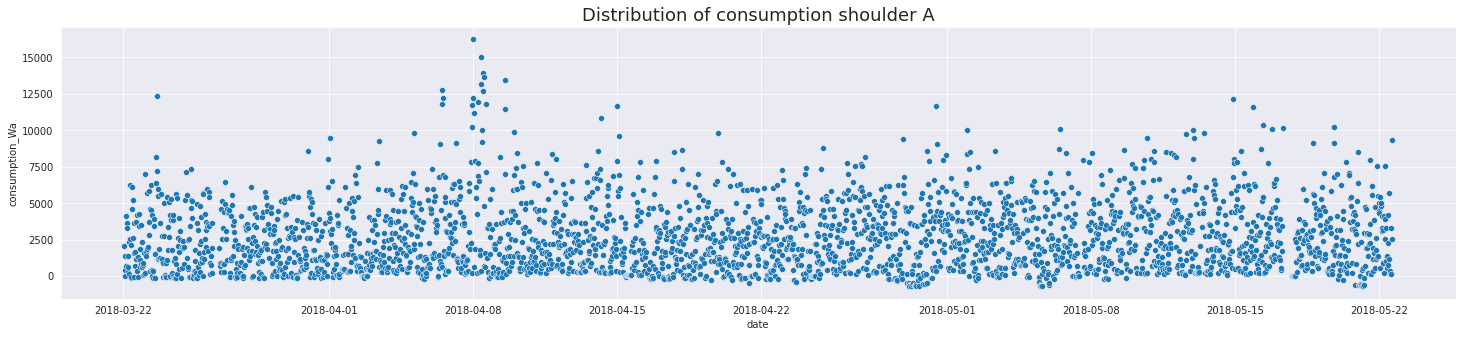

In [21]:
plt.subplots(figsize=(25, 5))
sns.scatterplot(data=data_df.consumption_Wa)
plt.title("Distribution of consumption shoulder A", fontsize=18)
plt.show()

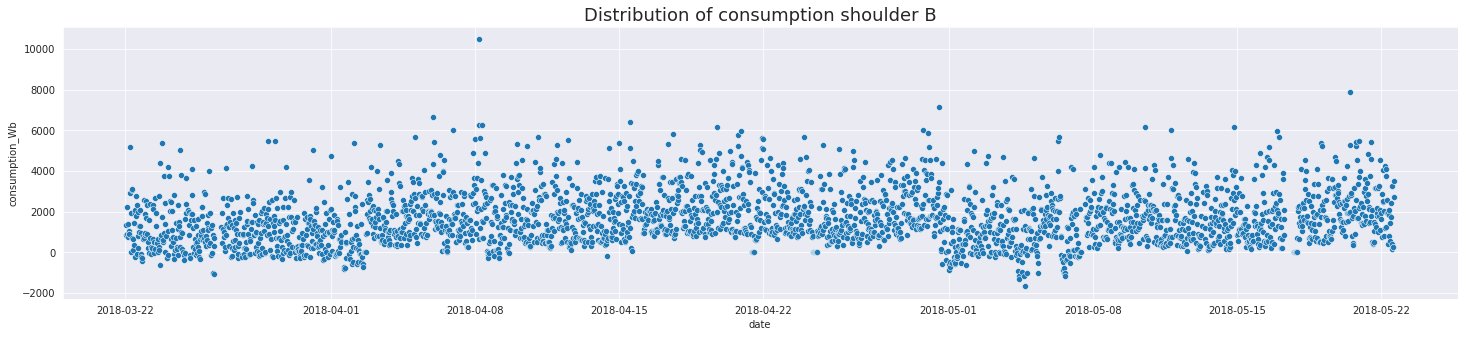

In [22]:
plt.subplots(figsize=(25, 5))
sns.scatterplot(data=data_df.consumption_Wb)
plt.title("Distribution of consumption shoulder B", fontsize=18)
plt.show()

Descriptive statistics:
count     2872.00
mean      2657.22
std       2361.77
min       -696.57
25%        760.15
50%       2149.73
75%       4046.43
max      16238.57
Name: consumption_Wa, dtype: float64
____________________________________________________________________________________________________

Skew:
1.19
____________________________________________________________________________________________________

Kurtosis:
1.93
____________________________________________________________________________________________________



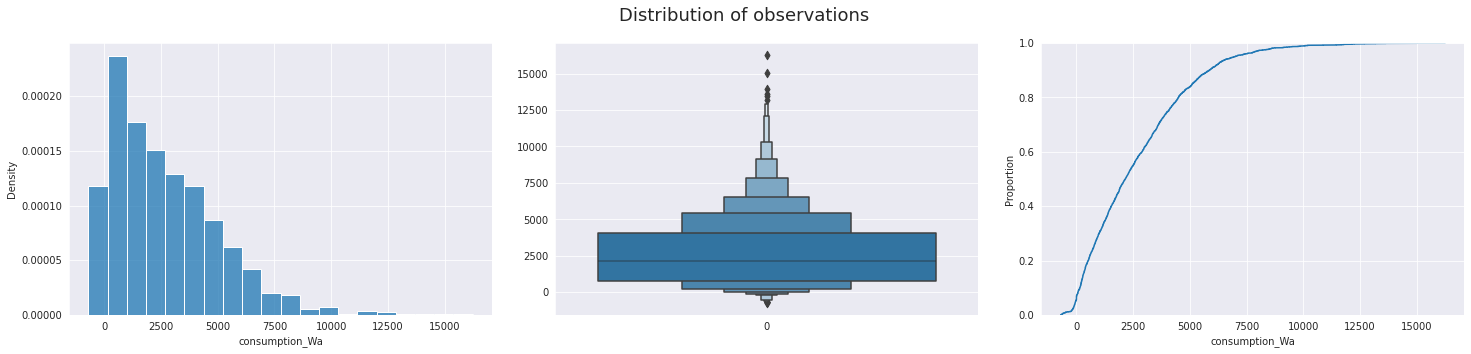

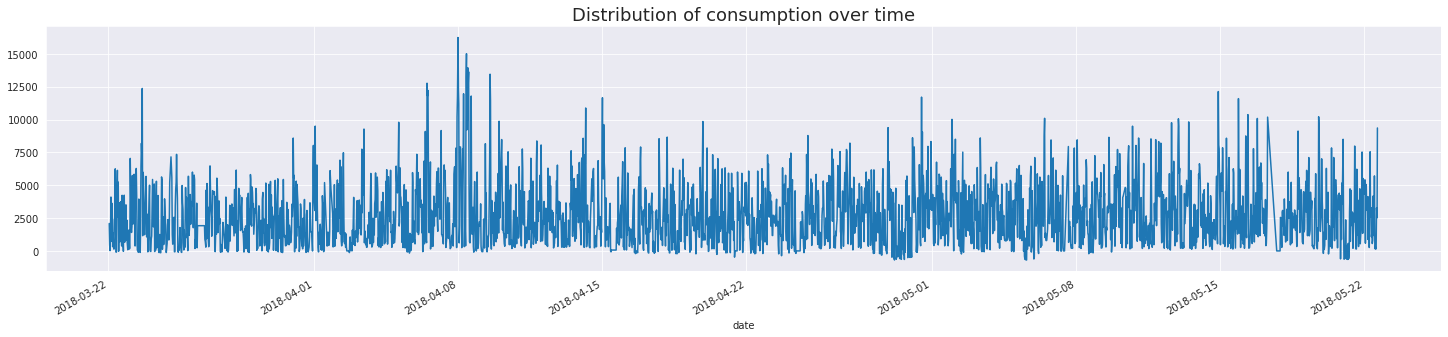

In [23]:
# Shoulder A
distribution(data_df["consumption_Wa"])

Descriptive statistics:
count     2872.00
mean      1673.50
std       1319.76
min      -1674.30
25%        737.91
50%       1458.61
75%       2376.19
max      10478.83
Name: consumption_Wb, dtype: float64
____________________________________________________________________________________________________

Skew:
0.91
____________________________________________________________________________________________________

Kurtosis:
1.32
____________________________________________________________________________________________________



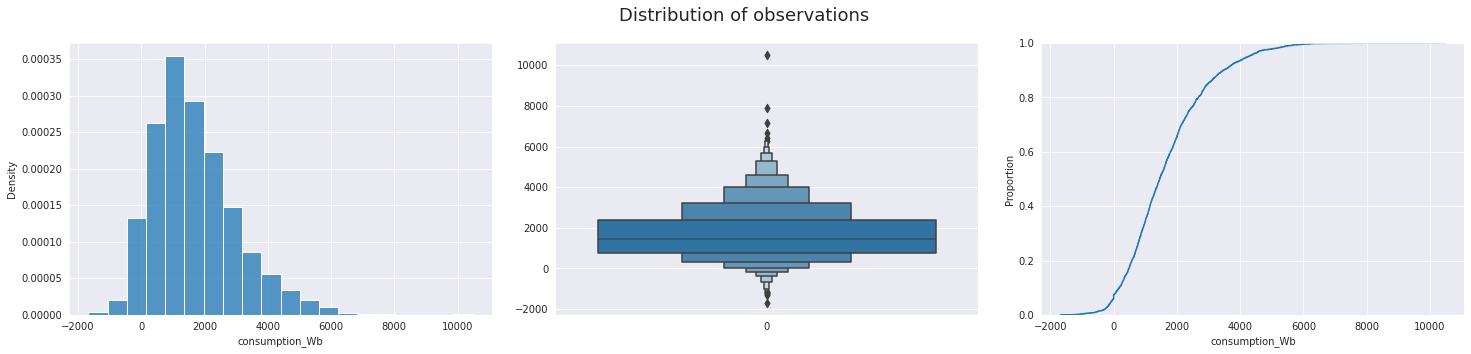

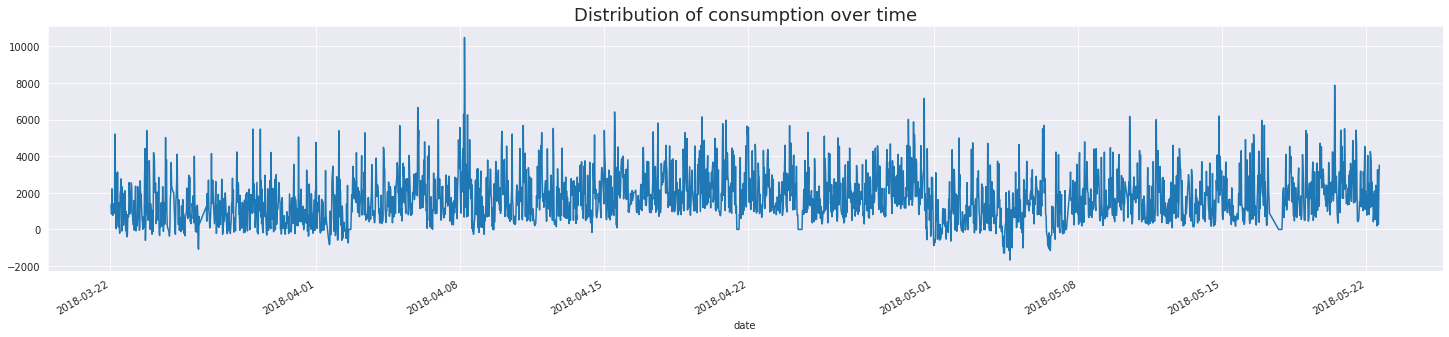

In [24]:
# Shoulder B
distribution(data_df["consumption_Wb"])

### Trend analysis

In [25]:
def trend_analysis(data_for_eda):
    # BUILDING MOVING AVERAGES
    
    # 7-day moving average
    data_7d_rol = data_for_eda.rolling(window = 7, center = True).mean()

    # 30-day moving average
    data_30d_rol = data_for_eda.rolling(window = 30, center = True).mean()

    # 365-day moving average
    data_365d_rol = data_for_eda.rolling(window = 365, center = True).mean()
    
    #PLOTTING MOVING AVERAGES
    
    fig, ax = plt.subplots(figsize = (20,5))

    # plotting daily data
    ax.plot(data_for_eda, marker='*', markersize=2, color='0.6',linestyle='None', label='Daily')

    # A fallback version of the presentation
    # ax.plot(novaya_entering_t2, linewidth=2, label='Daily', color='0.6', alpha = 0.5 )

    # plotting 7-day rolling data
    ax.plot(data_7d_rol, linewidth=2, label='7-d Rolling Mean')

    # plotting 30-day rolling data
    ax.plot(data_30d_rol, linewidth=2, label='30-d Rolling Mean')

    # plotting annual rolling data
    ax.plot(data_365d_rol, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

        
    # Beautification of plot
    # ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Consumption')
    ax.set_title('Trends', fontsize=18)

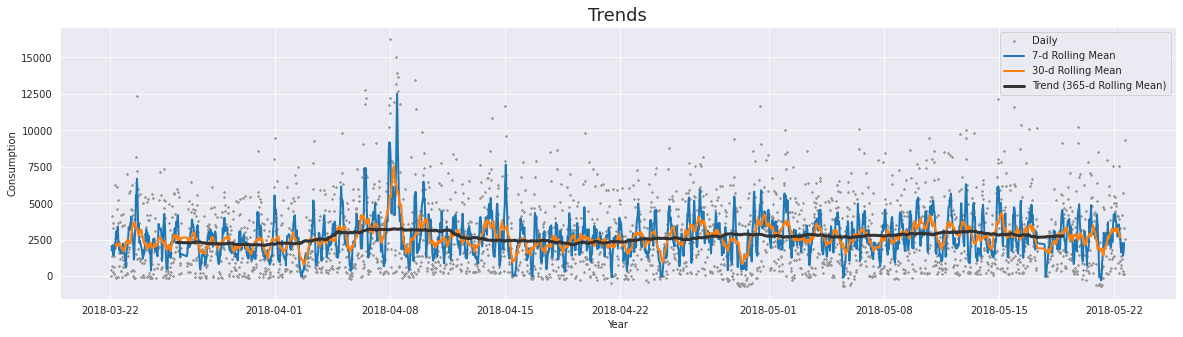

In [26]:
# Shoulder A
trend_analysis(data_df["consumption_Wa"])

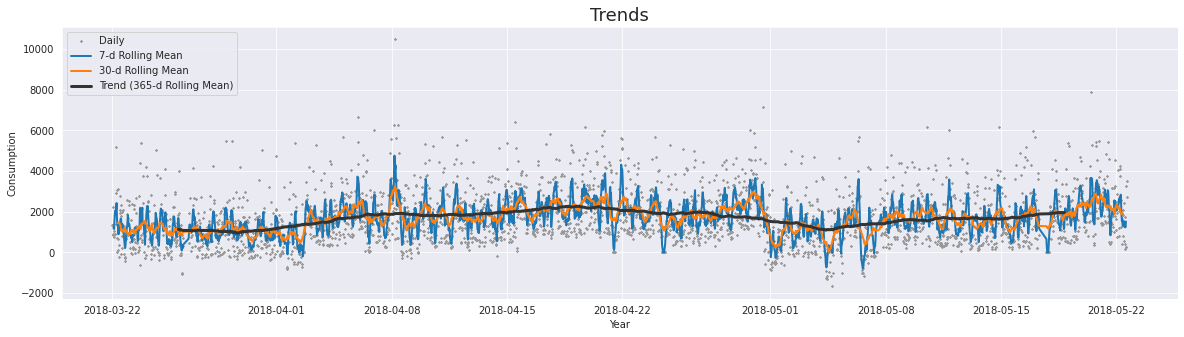

In [29]:
# Shoulder B
trend_analysis(data_df["consumption_Wb"])

### Autocorrelation analysis

In [28]:
def autocorr_analysis(data_for_eda):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 3), dpi= 100)

    sm.graphics.tsa.plot_acf(data_for_eda.values.squeeze(), lags=60, ax=ax[0])
    sm.graphics.tsa.plot_pacf(data_for_eda.values.squeeze(), lags=60, ax=ax[1])
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


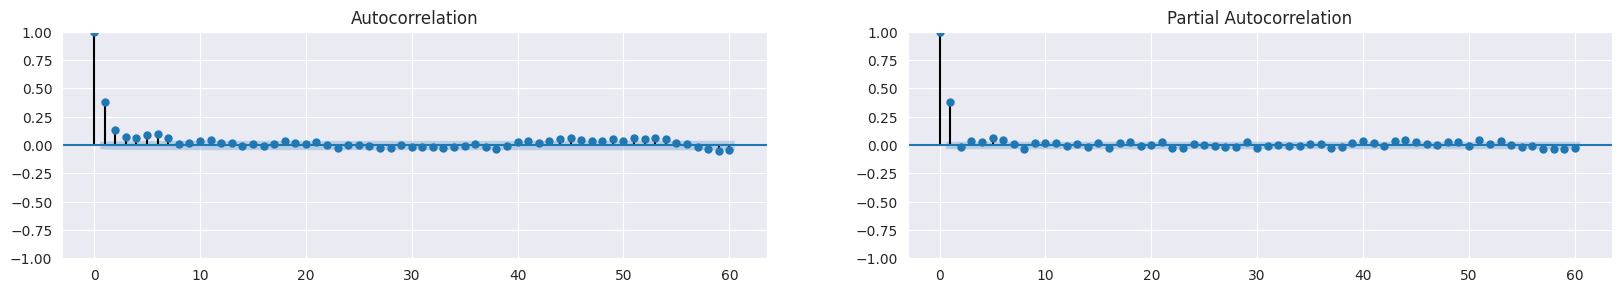

In [30]:
# Shoulder A
# Lag 30 days
autocorr_analysis(data_df["consumption_Wa"])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


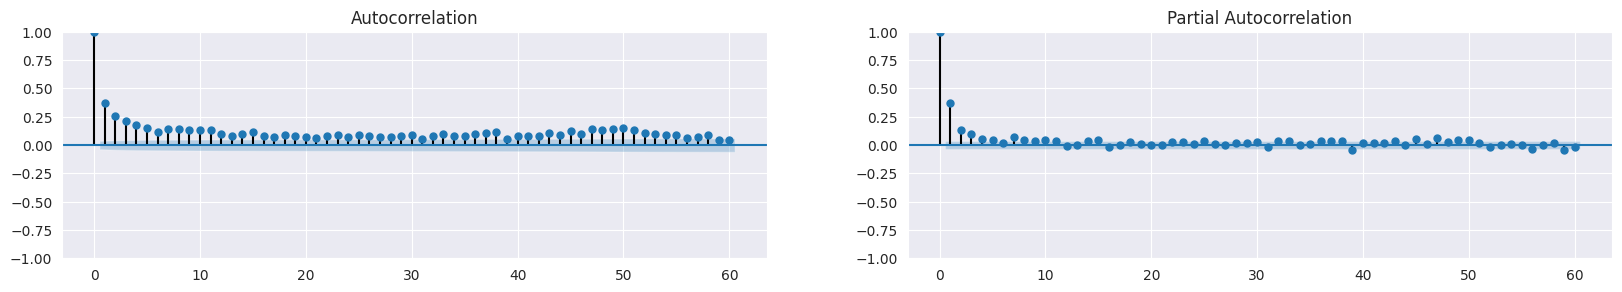

In [31]:
# Shoulder B
# Lag 30 days
autocorr_analysis(data_df["consumption_Wb"])

### Analysis of seasonality

In [35]:
def decomposition(data_for_eda, period=365):
    from pylab import rcParams
    rcParams['figure.figsize'] = 20,10
        
    decomposition = sm.tsa.seasonal_decompose(data_for_eda, model='additive', period=period)
    
    decomposition.plot()

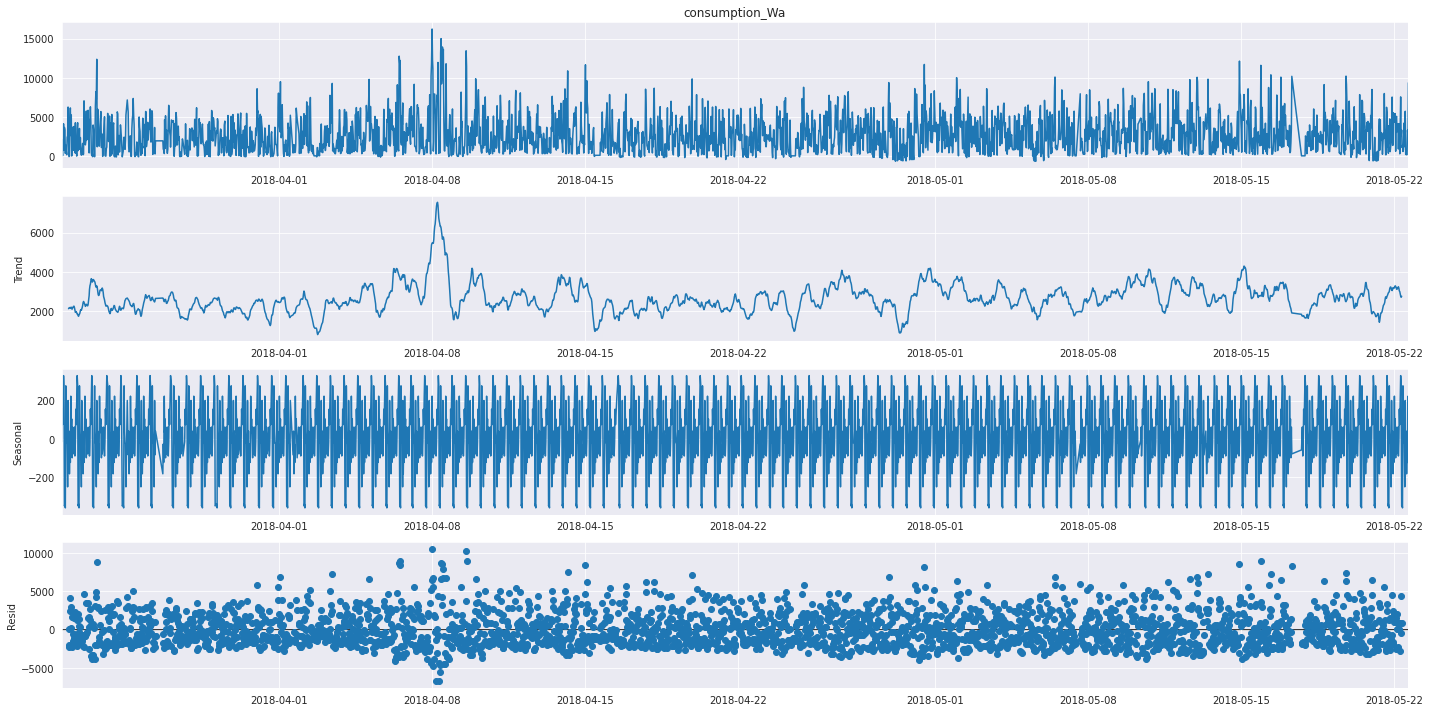

In [36]:
# Shoulder A
# Decomposition for 30 days
decomposition(data_df["consumption_Wa"], period=30)

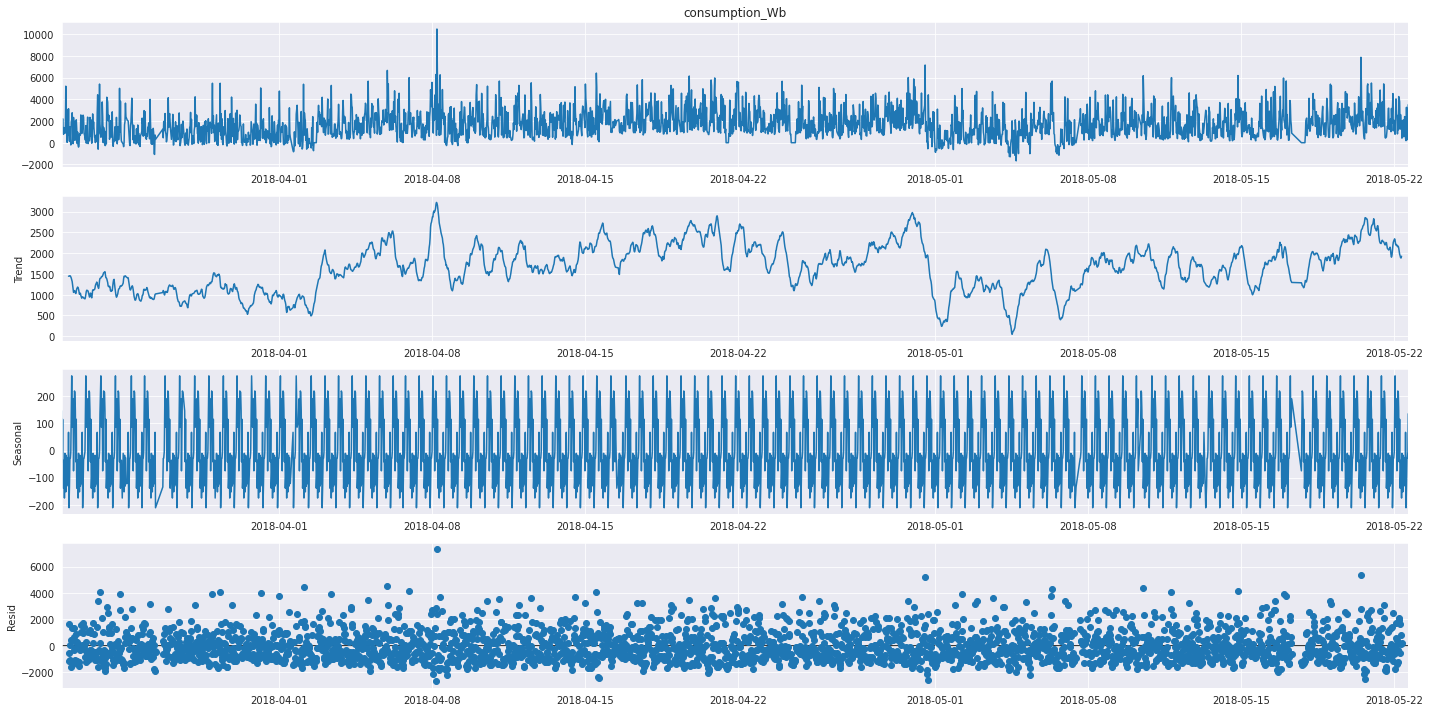

In [37]:
# Shoulder B
# Decomposition for 30 days
decomposition(data_df["consumption_Wb"], period=30)

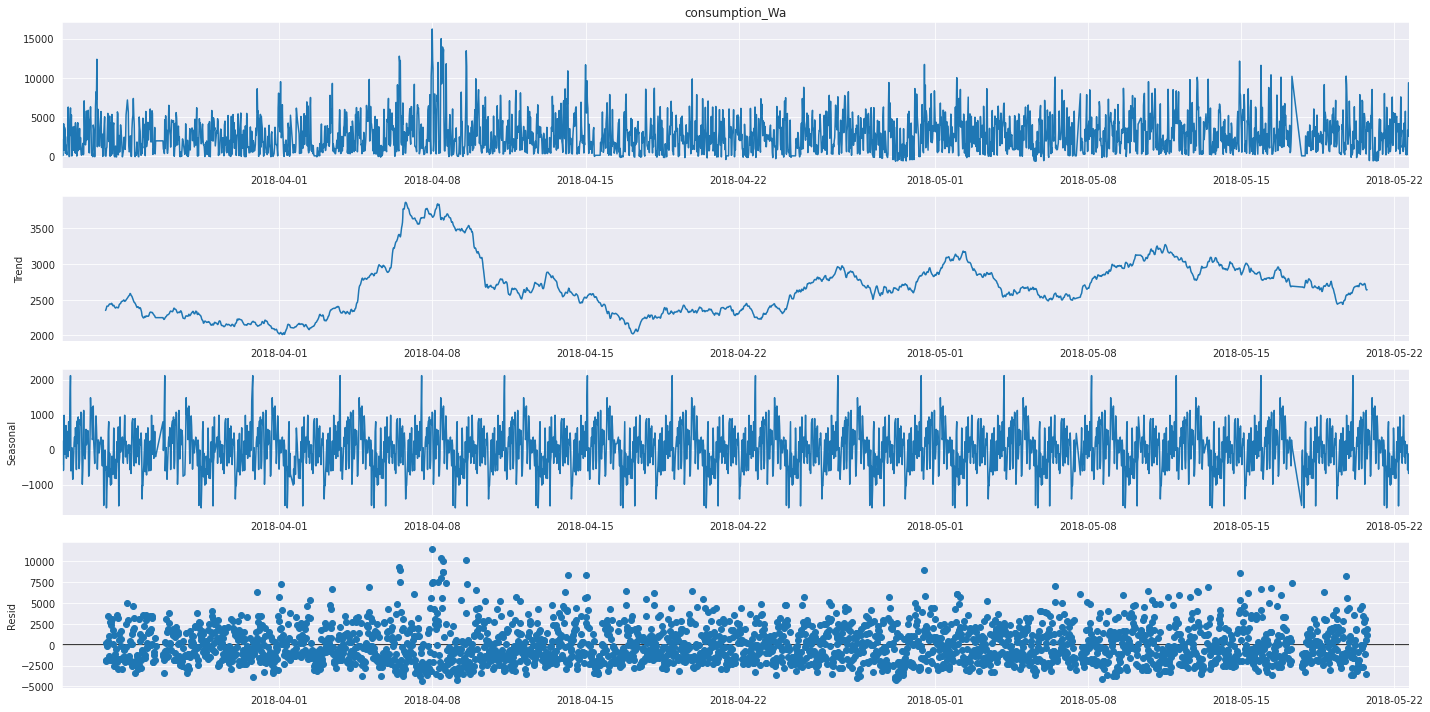

In [38]:
# Shoulder A
# Decomposition for 182 days
decomposition(data_df["consumption_Wa"], period=182)

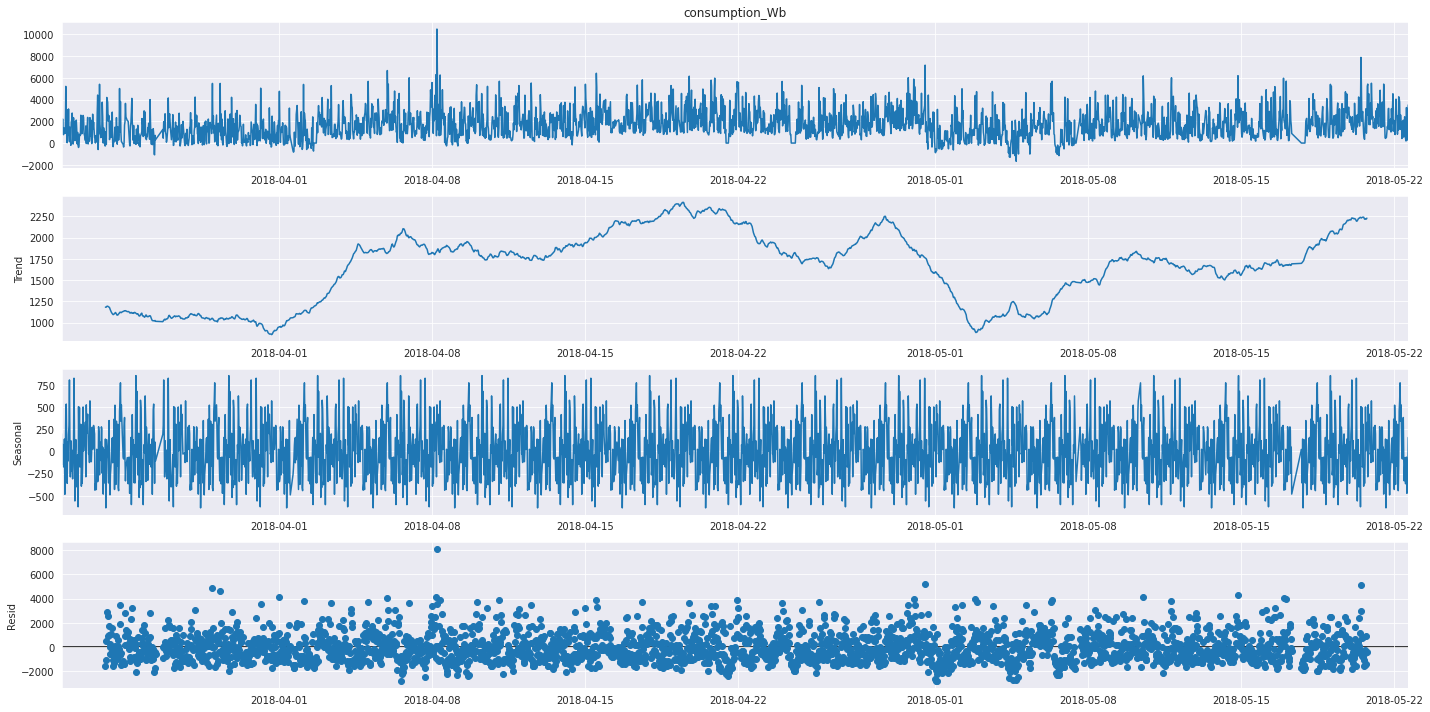

In [39]:
# Shoulder B
# Decomposition for 182 days
decomposition(data_df["consumption_Wb"], period=182)

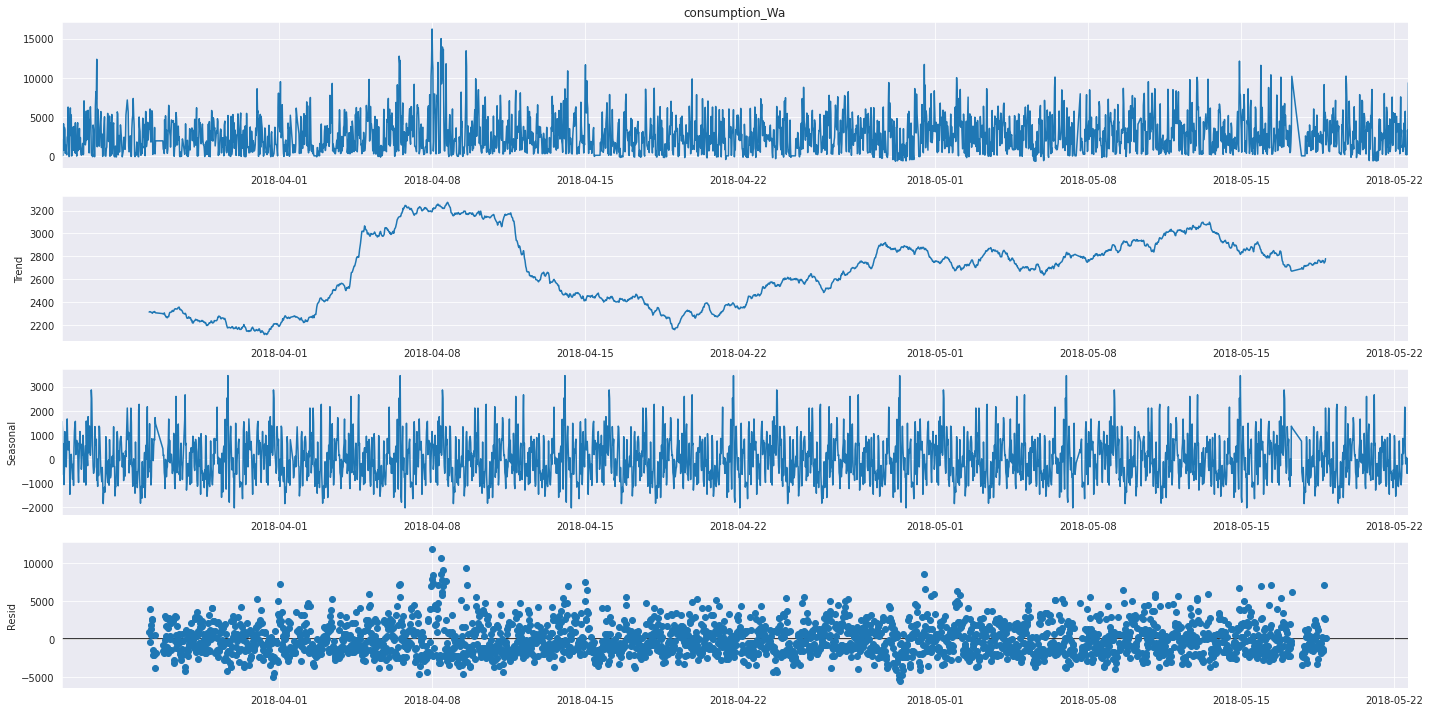

In [40]:
# Shoulder A
# Decomposition for 1 year
decomposition(data_df["consumption_Wa"], period=365)

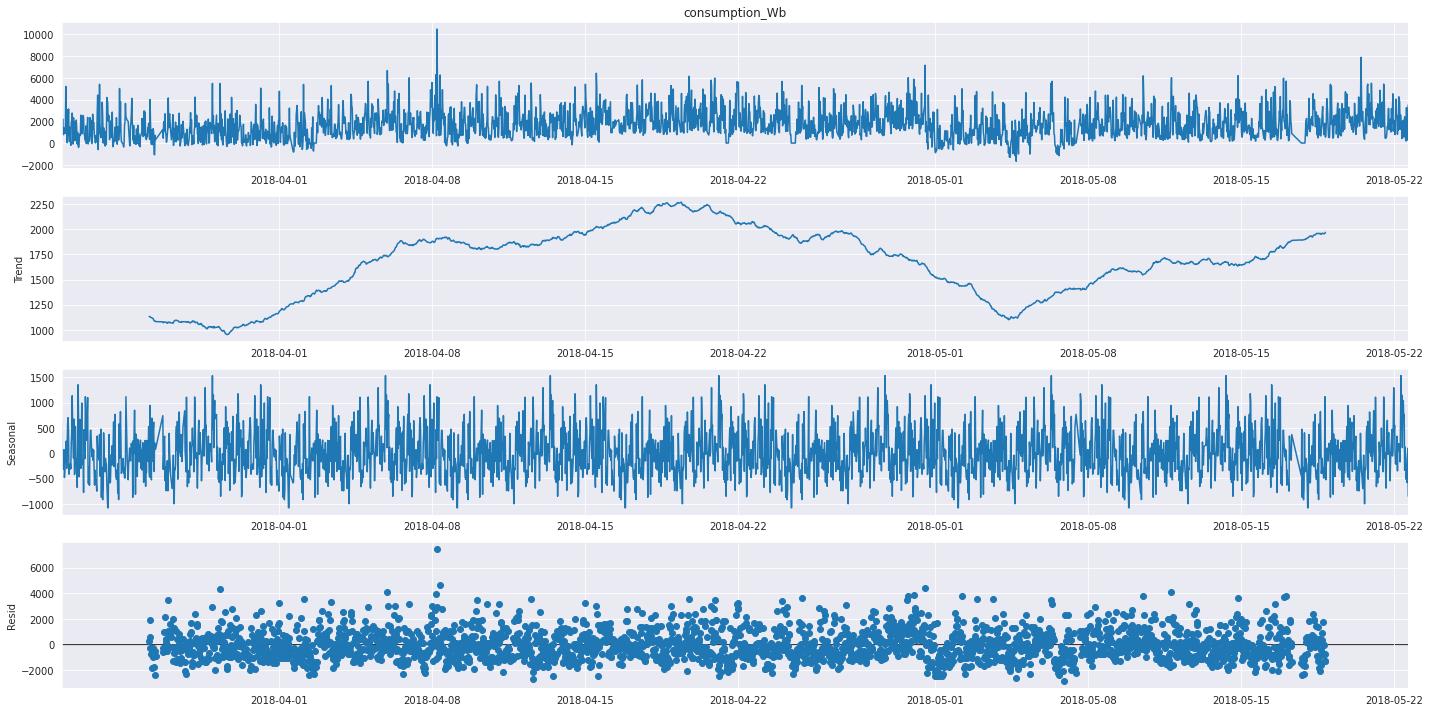

In [41]:
# Shoulder B
# Decomposition for 1 year
decomposition(data_df["consumption_Wb"], period=365)

### Analysis of stationarity

In [42]:
def stationarity_analysis(data_for_eda):
    test = sm.tsa.adfuller(data_for_eda)
    print ('adf:', test[0])
    print ('p-value:', test[1])
    print ('Critical values:', test[4])
    if test[0]> test[4]['5%']: 
        print ('\n There are single roots, the row is not stationary')
    else:
        print ('\n There are no single roots, the row is STATIONARY')

In [43]:
# Shoulder A
stationarity_analysis(data_df["consumption_Wb"])

adf: -9.345342859098697
p-value: 8.576387541097253e-16
Critical values: {'1%': -3.432640929340317, '5%': -2.862552176016622, '10%': -2.567308811060259}

 There are no single roots, the row is STATIONARY


In [44]:
# Shoulder B
stationarity_analysis(data_df["consumption_Wb"])

adf: -9.345342859098697
p-value: 8.576387541097253e-16
Critical values: {'1%': -3.432640929340317, '5%': -2.862552176016622, '10%': -2.567308811060259}

 There are no single roots, the row is STATIONARY
